# code review
- PEP8 compliance - spaces around operators FIXED
- dont use list use arrays when size is predetermined FIXED
- moved lines that do not depend on ff out of the ffs loop FIXED
- your fist savefig statement returned an error cause fig is not defined FIXED
- put counter so user knows how long its gonna be FIXED
- plot the firse derived product first, leff first then r which depends on leff FIXED

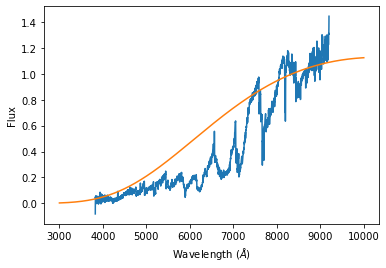

In [1]:
%matplotlib inline

import numpy as np
from utils import *
from config import *
import matplotlib.pyplot as plt
from mdwarf_interp import mdwarf_interp

WAVELENGTH = BBwave
mdwarf_interp('m5.all.na.k.fits', plotit=True)
plt.plot(WAVELENGTH, make_bb(WAVELENGTH, 2800, normed=1.6e22))

/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


in R DCR should be 57.1 arcsec:  55.870383732802885


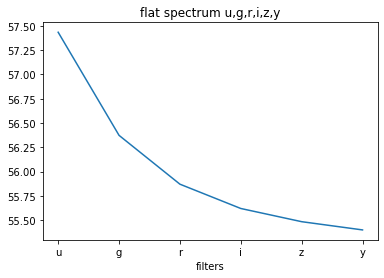

In [2]:
import numpy as np
from utils import *

filters = ['u', 'g', 'r', 'i', 'z', 'y']

#weff = np.array([lamb_eff_BB(band="g", temp=t, verbose=False) for t in range(100,100000,1000)])
weff = np.array([lamb_eff_BB(band=f, temp=3000, verbose=False) for f in filters])
plt.plot(dcr_offset(weff, airmass = 1.4))
plt.xlabel("filters")
plt.xticks(range(6), labels=["u","g","r","i","z","y"])
plt.title("flat spectrum u,g,r,i,z,y")
print("in R DCR should be 57.1 arcsec: ", dcr_offset(weff[2], airmass = 1.4))

/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


DCR in r should be 


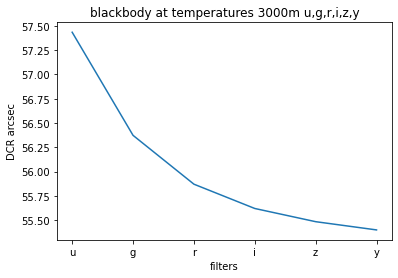

In [3]:
weff = np.array([lamb_eff_BB(band=f, temp=3000, verbose=False) for f in filters])
plt.plot(dcr_offset(weff, airmass = 1.4))
plt.ylabel("DCR arcsec")
plt.xlabel("filters")
plt.xticks(range(6), labels=["u","g","r","i","z","y"])
plt.title("blackbody at temperatures 3000m u,g,r,i,z,y");
print("DCR in r should be ")

/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


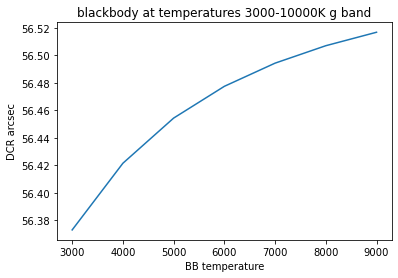

In [4]:
weff = np.array([lamb_eff_BB(band="g", temp=t, verbose=False) 
                 for t in range(3000,10000,1000)])
plt.plot(range(3000,10000,1000), dcr_offset(weff, airmass = 1.4))
plt.ylabel("DCR arcsec")
plt.xlabel("BB temperature")
plt.title("blackbody at temperatures 3000-10000K g band");

/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


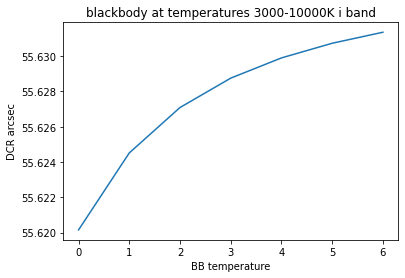

In [5]:
weff = np.array([lamb_eff_BB(band="i", temp=t, verbose=False) 
                 for t in range(3000,10000,1000)])
plt.plot(dcr_offset(weff, airmass = 1.4))
plt.ylabel("DCR arcsec")
plt.xlabel("BB temperature")
plt.title("blackbody at temperatures 3000-10000K i band");

/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


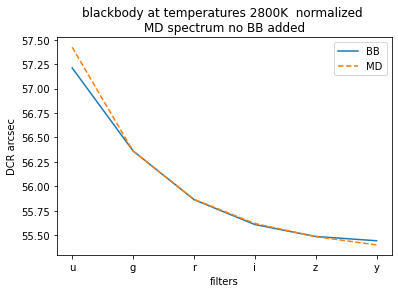

In [6]:
w_eff1 = np.array([lamb_eff_md(band=f, temp=2800, mdname='m5.all.na.k.fits', ff=0)  
                  for f in filters])
w_eff2 = np.array([lamb_eff_BB(band=f, temp=2800,)  
                  for f in filters])
plt.plot(dcr_offset(w_eff1, airmass = 1.4), label="BB")
plt.plot(dcr_offset(w_eff2, airmass = 1.4), '--', label="MD")
plt.ylabel("DCR arcsec")
plt.xlabel("filters")
plt.xticks(range(6), labels=["u","g","r","i","z","y"])
plt.title("blackbody at temperatures 2800K  normalized \nMD spectrum no BB added")
plt.legend();

/Users/Riley/opt/anaconda3/envs/rubin/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


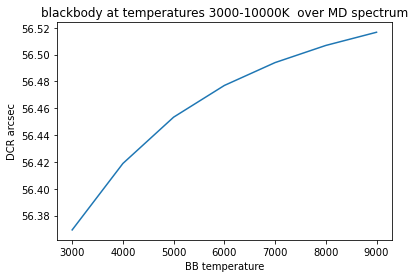

In [7]:
w_eff = np.array([lamb_eff_md(band='g', temp=t, mdname='m5.all.na.k.fits', ff=0.5)  
                   for t in range(3000,10000,1000)])
plt.plot(range(3000,10000,1000), dcr_offset(w_eff, airmass = 1.4))
plt.ylabel("DCR arcsec")
plt.xlabel("BB temperature")
plt.title("blackbody at temperatures 3000-10000K  over MD spectrum");